In [52]:
import pandas as pd



# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [53]:
df.columns

Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

# Select features and target
features = ['Hidden Gem Score', 'Runtime', 'Awards Received', 'Awards Nominated For',
           'Boxoffice', 'IMDb Votes', 'Minimum Age'] + \
           [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 
           'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
           'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 
           'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

target = 'IMDb Score'

X = df[features]
scaler = StandardScaler()

In [55]:
# Define target columns
target_im = 'IMDb Score'
target_rt = 'Rotten Tomatoes Score'
target_mc = 'Metacritic Score'

# Prepare data for IMDb Score
y_im = df[target_im]
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X, y_im, test_size=0.2, random_state=42)

# Prepare data for Rotten Tomatoes Score
y_rt = df[target_rt]
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X, y_rt, test_size=0.2, random_state=42)

# Prepare data for Metacritic Score
y_mc = df[target_mc]
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y_mc, test_size=0.2, random_state=42)

# Scale features (reusing existing scaler)
X_train_im_scaled = scaler.fit_transform(X_train_im)
X_test_im_scaled = scaler.transform(X_test_im)
X_train_rt_scaled = scaler.fit_transform(X_train_rt)
X_test_rt_scaled = scaler.transform(X_test_rt)
X_train_mc_scaled = scaler.fit_transform(X_train_mc)
X_test_mc_scaled = scaler.transform(X_test_mc)

# Train models
model_im = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_rt = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_mc = SVR(kernel='rbf', C=1.0, epsilon=0.1)

model_im.fit(X_train_im_scaled, y_train_im)
model_rt.fit(X_train_rt_scaled, y_train_rt)
model_mc.fit(X_train_mc_scaled, y_train_mc)

# Make predictions
y_pred_im = model_im.predict(X_test_im_scaled)
y_pred_rt = model_rt.predict(X_test_rt_scaled)
y_pred_mc = model_mc.predict(X_test_mc_scaled)

# Evaluate models
mae_im = mean_absolute_error(y_test_im, y_pred_im)
mse_im = mean_squared_error(y_test_im, y_pred_im)
r2_im = r2_score(y_test_im, y_pred_im)

mae_rt = mean_absolute_error(y_test_rt, y_pred_rt)
mse_rt = mean_squared_error(y_test_rt, y_pred_rt)
r2_rt = r2_score(y_test_rt, y_pred_rt)

mae_mc = mean_absolute_error(y_test_mc, y_pred_mc)
mse_mc = mean_squared_error(y_test_mc, y_pred_mc)
r2_mc = r2_score(y_test_mc, y_pred_mc)

# Print results
print("IMDb Metrics:")
print(f'Mean Absolute Error: {mae_im}')
print(f'Mean Squared Error: {mse_im}')
print(f'R^2 Score: {r2_im}')

print("\nRotten Tomatoes Score Metrics:")
print(f"Mean Absolute Error: {mae_rt}")
print(f"Mean Squared Error: {mse_rt}")
print(f"R^2 Score: {r2_rt}")

print("\nMetacritic Score Metrics:")
print(f"Mean Absolute Error: {mae_mc}")
print(f"Mean Squared Error: {mse_mc}")
print(f"R^2 Score: {r2_mc}")

IMDb Metrics:
Mean Absolute Error: 0.3703880025401289
Mean Squared Error: 0.283836406985222
R^2 Score: 0.6711447705230813

Rotten Tomatoes Score Metrics:
Mean Absolute Error: 14.113133115259405
Mean Squared Error: 341.6351566610014
R^2 Score: 0.5106618942543443

Metacritic Score Metrics:
Mean Absolute Error: 8.572518901202292
Mean Squared Error: 124.45427208452799
R^2 Score: 0.5886967163276667


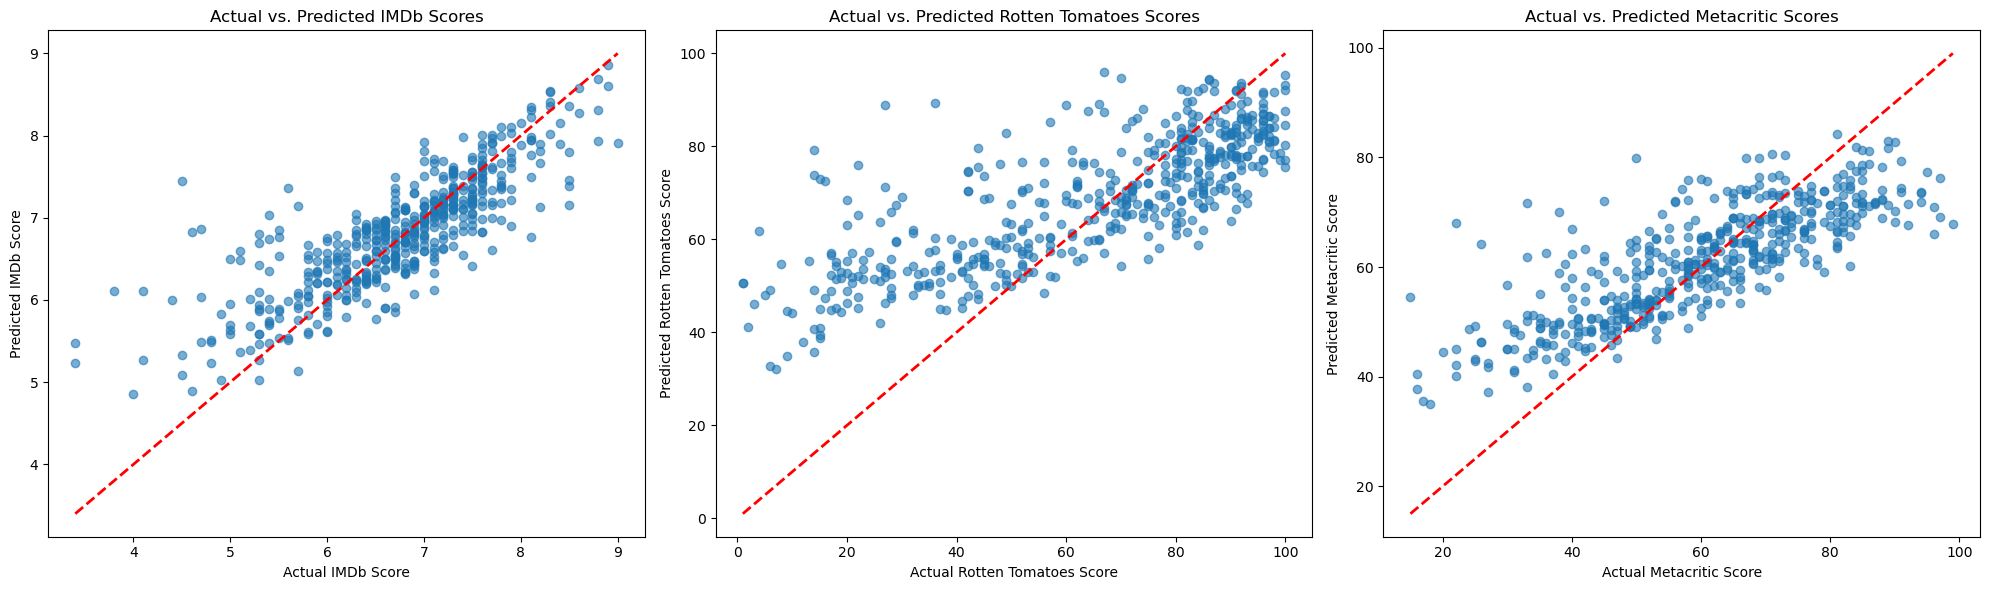

In [56]:
import matplotlib.pyplot as plt

# Set up figure with 1x3 subplots
plt.figure(figsize=(20, 6))

# IMDb Score plot
plt.subplot(1, 3, 1)
plt.scatter(y_test_im, y_pred_im, alpha=0.6)
plt.plot([y_test_im.min(), y_test_im.max()], [y_test_im.min(), y_test_im.max()], 'r--', lw=2)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs. Predicted IMDb Scores')

# Rotten Tomatoes plot
plt.subplot(1, 3, 2)
plt.scatter(y_test_rt, y_pred_rt, alpha=0.6)
plt.plot([y_test_rt.min(), y_test_rt.max()], [y_test_rt.min(), y_test_rt.max()], 'r--', lw=2)
plt.xlabel('Actual Rotten Tomatoes Score')
plt.ylabel('Predicted Rotten Tomatoes Score')
plt.title('Actual vs. Predicted Rotten Tomatoes Scores')

# Metacritic plot
plt.subplot(1, 3, 3)
plt.scatter(y_test_mc, y_pred_mc, alpha=0.6)
plt.plot([y_test_mc.min(), y_test_mc.max()], [y_test_mc.min(), y_test_mc.max()], 'r--', lw=2)
plt.xlabel('Actual Metacritic Score')
plt.ylabel('Predicted Metacritic Score')
plt.title('Actual vs. Predicted Metacritic Scores')

plt.tight_layout()